## Research question 3
Does the quality of family relationships, parents' cohabitation status have an impact on alcohol consumption?

selected columns::
[['famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'guardian_father', 'guardian_mother', 'guardian_other', 'famsup_no', 'famsup_yes', 'Medu', 'Fedu']]

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import scikitplot as skplt



from sklearn import set_config
set_config(transform_output = "pandas")

## Function to save figures

In [2]:
from pathlib import Path
IMAGES_PATH = Path() / "images"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [3]:
# Import train and test sets
X_train = pd.read_csv('smoteTrainSet.csv')
X_test = pd.read_csv('ScaledTestSet.csv')

In [4]:
X_train.columns

Index(['sex_F', 'sex_M', 'famsize_GT3', 'famsize_LE3', 'Pstatus_A',
       'Pstatus_T', 'Mjob_at_home', 'Mjob_health', 'Mjob_other',
       'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health',
       'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'guardian_father',
       'guardian_mother', 'guardian_other', 'schoolsup_no', 'schoolsup_yes',
       'famsup_no', 'famsup_yes', 'paid_no', 'paid_yes', 'activities_no',
       'activities_yes', 'higher_no', 'higher_yes', 'romantic_no',
       'romantic_yes', 'age', 'Medu', 'Fedu', 'studytime', 'failures',
       'famrel', 'freetime', 'goout', 'health', 'absences', 'avg_grade',
       'alc'],
      dtype='object')

In [5]:
X_train.shape

(916, 43)

In [6]:
# Separate target from dataset
y_train = X_train['alc']
#X_train = X_train.drop(columns = ['alc'])
X_train = X_train [['famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'guardian_father', 'guardian_mother', 'guardian_other', 'famsup_no', 'famsup_yes', 'Medu', 'Fedu']] 
y_test = X_test['alc']
X_test = X_test [['famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'guardian_father', 'guardian_mother', 'guardian_other', 'famsup_no', 'famsup_yes', 'Medu', 'Fedu']]
#X_test = X_test.drop(columns = 'alc')

In [7]:
y_train.value_counts()

0.0    458
1.0    458
Name: alc, dtype: int64

## 0R classifier

In [8]:
from sklearn.dummy import DummyClassifier
dummy = DummyClassifier(strategy = "most_frequent")



In [9]:
dummy.fit(X_train,y_train)

DummyClassifier(strategy='most_frequent')

In [10]:
from sklearn.metrics import accuracy_score
print('Train Accuracy', accuracy_score(y_train, dummy.predict(X_train)))
print('Test Accuracy', accuracy_score(y_test, dummy.predict(X_test)))

Train Accuracy 0.5
Test Accuracy 0.5502392344497608


## Hyperparameter Tuning on KNN

In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [12]:
param_grid = {
    'n_neighbors' : [5, 10, 25, 50],
    'weights' : ['uniform', 'distance']
}


In [13]:
knn_grid = KNeighborsClassifier()
grid_search_knn = GridSearchCV(estimator=knn_grid,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search_knn.fit(X_train,y_train)

Fitting 10 folds for each of 8 candidates, totalling 80 fits


GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [5, 10, 25, 50],
                         'weights': ['uniform', 'distance']},
             verbose=2)

In [14]:
best_grid_knn = grid_search_knn.best_estimator_

In [15]:
best_grid_knn

KNeighborsClassifier(n_neighbors=25, weights='distance')

## Applying best estimators in KNN Classifier

[[89 26]
 [31 63]]
Accuracy Score 0.7272727272727273
Classification report:               precision    recall  f1-score   support

         0.0       0.74      0.77      0.76       115
         1.0       0.71      0.67      0.69        94

    accuracy                           0.73       209
   macro avg       0.72      0.72      0.72       209
weighted avg       0.73      0.73      0.73       209



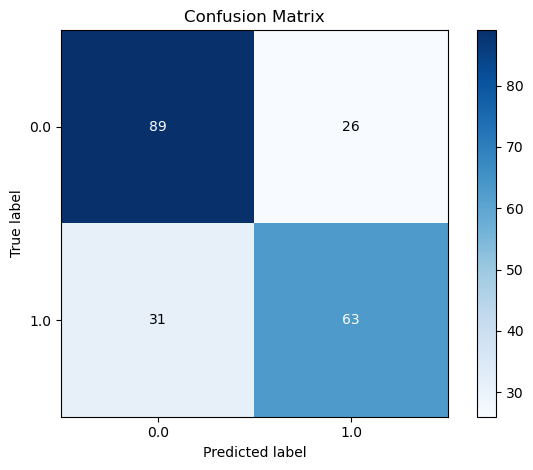

In [16]:
best_grid_knn.fit(X_train, y_train)
y_pred=best_grid_knn.predict(X_test)
print(confusion_matrix(y_test,y_pred))
skplt.metrics.plot_confusion_matrix(y_test, y_pred);
save_fig('Confusion Matrix for KNN hyper-para tuned q3')
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

In [17]:
pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})

,y_test,y_pred
0,0.0,0.0
1,0.0,1.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
204,1.0,1.0
205,1.0,1.0
206,0.0,1.0
207,0.0,0.0


In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
# !pip install scikit-plot


import scikitplot as skplt
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
print('Test Accuracy ', accuracy_score(y_test, y_pred ))

Test Accuracy  0.7272727272727273


              precision    recall  f1-score   support

         0.0       0.74      0.77      0.76       115
         1.0       0.71      0.67      0.69        94

    accuracy                           0.73       209
   macro avg       0.72      0.72      0.72       209
weighted avg       0.73      0.73      0.73       209



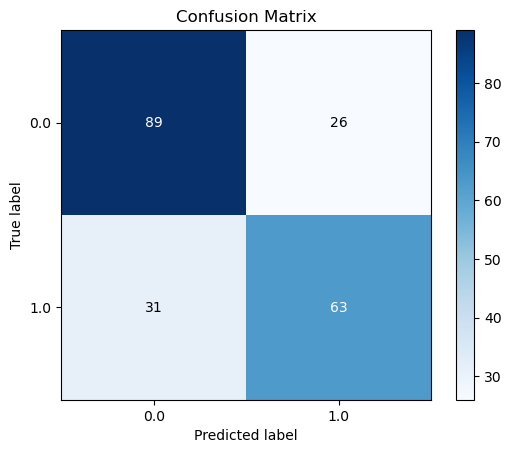

In [20]:
print(classification_report(y_test, y_pred))
skplt.metrics.plot_confusion_matrix(y_test, y_pred);
#save_fig('Confusion Matrix for KNN q3')

## Hyperparameter Tuning on Decision Tree

In [21]:
from sklearn.tree import DecisionTreeClassifier

In [22]:
param_grid = {
    'criterion' : ['gini', 'entropy', 'log_loss'],
    'splitter' : ['best', 'random'],
    'max_depth' : [5, 10, 15, 30],
    'max_features' : ['auto', 'sqrt']
}

In [23]:
dt_grid = DecisionTreeClassifier()
grid_search_dt = GridSearchCV(estimator=dt_grid,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search_dt.fit(X_train,y_train)

Fitting 10 folds for each of 48 candidates, totalling 480 fits


/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been depre

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been depre

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [5, 10, 15, 30],
                         'max_features': ['auto', 'sqrt'],
                         'splitter': ['best', 'random']},
             verbose=2)

In [24]:
best_grid_dt = grid_search_dt.best_estimator_
best_grid_dt

DecisionTreeClassifier(max_depth=30, max_features='auto')

## Appying best estimators on Decision Tree

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[[90 25]
 [37 57]]
Accuracy Score 0.7033492822966507
Classification report:               precision    recall  f1-score   support

         0.0       0.71      0.78      0.74       115
         1.0       0.70      0.61      0.65        94

    accuracy                           0.70       209
   macro avg       0.70      0.69      0.70       209
weighted avg       0.70      0.70      0.70       209



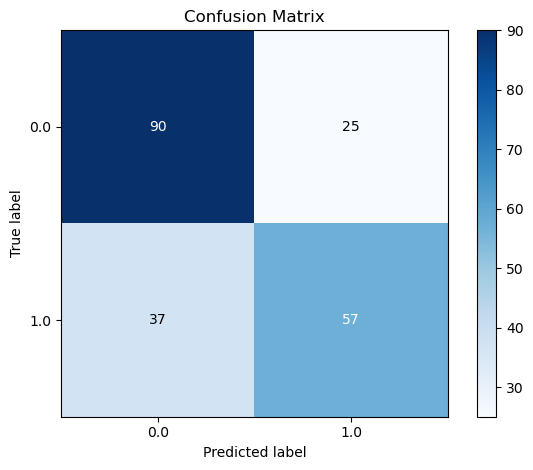

In [25]:
best_grid_dt.fit(X_train, y_train)
y_pred=best_grid_dt.predict(X_test)
print(confusion_matrix(y_test,y_pred))
skplt.metrics.plot_confusion_matrix(y_test, y_pred);
save_fig('Confusion Matrix for Descision_Tree hyper-para tuned q3')
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt, 
                   feature_names=X_train.columns.values.tolist(),  
                   class_names=y_train.name,
                   filled=True)

fig.savefig("decistion_tree.png")


In [26]:
from pathlib import Path

IMAGES_PATH = Path() / "images" / "decision_trees"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

Max Depth =  1 , Train Acc. =  0.568 , Test Acc. =  0.493
Max Depth =  2 , Train Acc. =  0.587 , Test Acc. =  0.522
Max Depth =  3 , Train Acc. =  0.597 , Test Acc. =  0.541
Max Depth =  4 , Train Acc. =  0.631 , Test Acc. =  0.612
Max Depth =  5 , Train Acc. =  0.655 , Test Acc. =  0.589
Max Depth =  6 , Train Acc. =  0.671 , Test Acc. =  0.593
Max Depth =  7 , Train Acc. =  0.707 , Test Acc. =  0.612
Max Depth =  8 , Train Acc. =  0.726 , Test Acc. =  0.651
Max Depth =  9 , Train Acc. =  0.751 , Test Acc. =  0.665
Max Depth =  10 , Train Acc. =  0.791 , Test Acc. =  0.675
Max Depth =  11 , Train Acc. =  0.816 , Test Acc. =  0.684
Max Depth =  12 , Train Acc. =  0.838 , Test Acc. =  0.703
Max Depth =  13 , Train Acc. =  0.865 , Test Acc. =  0.708
Max Depth =  14 , Train Acc. =  0.883 , Test Acc. =  0.722
Max Depth =  15 , Train Acc. =  0.892 , Test Acc. =  0.727
Max Depth =  16 , Train Acc. =  0.895 , Test Acc. =  0.722
Max Depth =  17 , Train Acc. =  0.898 , Test Acc. =  0.732
Max De

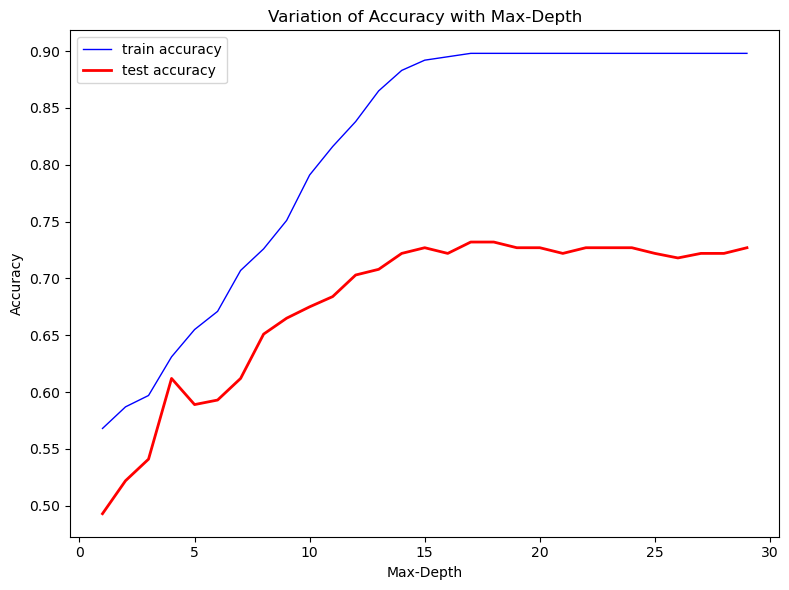

In [27]:
train_acc = []
test_acc = []
max_depth =[]

for depth in range(1, 30):
    clf = DecisionTreeClassifier(max_depth = depth)
    clf.fit(X_train, y_train)
    train_acc.append(accuracy_score(y_train, clf.predict(X_train)).round(3))
    test_acc.append(accuracy_score(y_test, clf.predict(X_test)).round(3))
    max_depth.append(depth)

for i in range(1, 30):
    print('Max Depth = ', i, ', Train Acc. = ', train_acc[i-1], ', Test Acc. = ' ,
         test_acc[i-1])

plt.figure(figsize = (8,6))
plt.xlabel('Max-Depth')
plt.ylabel('Accuracy')
plt.title('Variation of Accuracy with Max-Depth')
plt.plot(max_depth, train_acc, color = 'blue', linewidth = 1,
         label = 'train accuracy');

plt.plot(max_depth, test_acc, color = 'red', linewidth = 2,
         label = 'test accuracy')
plt.legend()
save_fig('Accuracy against max_depth')
plt.show();

In [28]:
# Confusion matrix for train set
print("Confusion Matrix for Train Set")
pd. DataFrame (confusion_matrix(y_train, best_grid_dt.predict(X_train)))


Confusion Matrix for Train Set


,0,1
0,435,23
1,70,388


In [29]:
# Confusion matrix for test set
print("Confusion Matrix for Test Set")
pd. DataFrame (confusion_matrix(y_test, best_grid_dt.predict(X_test)))

Confusion Matrix for Test Set


,0,1
0,90,25
1,37,57


In [30]:
print("Classification Report for Train Set")
print(classification_report (y_train, best_grid_dt.predict(X_train).round (3)))

Classification Report for Train Set
              precision    recall  f1-score   support

         0.0       0.86      0.95      0.90       458
         1.0       0.94      0.85      0.89       458

    accuracy                           0.90       916
   macro avg       0.90      0.90      0.90       916
weighted avg       0.90      0.90      0.90       916



In [31]:
print("Classification Report for Test Set")
print(classification_report(y_test, best_grid_dt.predict (X_test). round(3)))

Classification Report for Test Set
              precision    recall  f1-score   support

         0.0       0.71      0.78      0.74       115
         1.0       0.70      0.61      0.65        94

    accuracy                           0.70       209
   macro avg       0.70      0.69      0.70       209
weighted avg       0.70      0.70      0.70       209



## Hyperparameter Tuning on Random Forest

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


In [33]:
param_grid= {
    'n_estimators': [10, 50, 100],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [None, 10, 30, 100],
    'max_features': [None, 'sqrt', 'log2']
}

In [34]:
param_grid= {
    'n_estimators': [10]
}

In [35]:
rf_grid = RandomForestClassifier()
grid_search_rf = GridSearchCV(estimator=rf_grid,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search_rf.fit(X_train,y_train)

Fitting 10 folds for each of 1 candidates, totalling 10 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'n_estimators': [10]}, verbose=2)

In [36]:
# Finding out the best estimator
best_grid_rf = grid_search_rf.best_estimator_
best_grid_rf

RandomForestClassifier(n_estimators=10)

In [37]:
best_grid_rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10)

In [38]:
y_pred = best_grid_rf.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

[[82 33]
 [30 64]]
Accuracy Score 0.6985645933014354
Classification report:               precision    recall  f1-score   support

         0.0       0.73      0.71      0.72       115
         1.0       0.66      0.68      0.67        94

    accuracy                           0.70       209
   macro avg       0.70      0.70      0.70       209
weighted avg       0.70      0.70      0.70       209



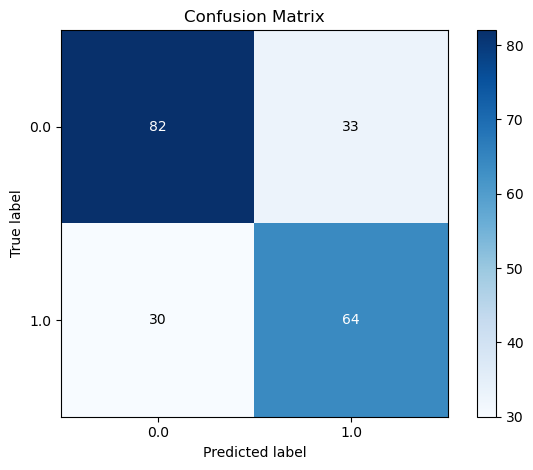

In [39]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred);
save_fig('Confusion Matrix for Random forest hyper-para tuned q3')

## Random Forest

In [40]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier=RandomForestClassifier(n_estimators=10).fit(X_train,y_train)
prediction=rf_classifier.predict(X_test)

[[91 24]
 [30 64]]
0.7416267942583732
              precision    recall  f1-score   support

         0.0       0.75      0.79      0.77       115
         1.0       0.73      0.68      0.70        94

    accuracy                           0.74       209
   macro avg       0.74      0.74      0.74       209
weighted avg       0.74      0.74      0.74       209



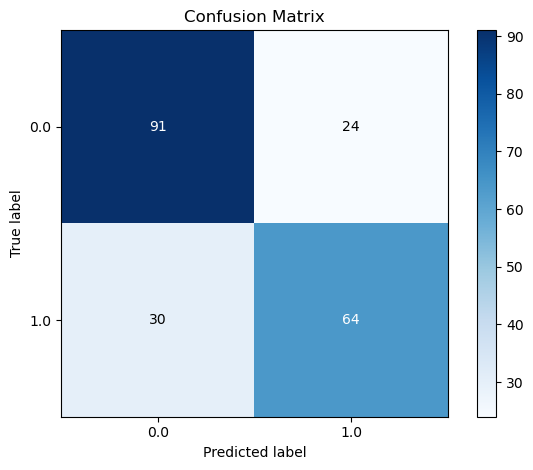

In [41]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(y_test,prediction))
skplt.metrics.plot_confusion_matrix(y_test, prediction);
save_fig('Confusion Matrix for Random forest q3')
print(accuracy_score(y_test,prediction))
print(classification_report(y_test,prediction))

## Reshaping (Not Necessary)

 y_train.values.reshape(-1, 1)

X_train.values

## Hyperparameter Tuning on Logistic Regression

In [42]:
from sklearn.linear_model import LogisticRegression

In [43]:
param_grid = {
    'penalty' : ['l1', 'l2', 'elasticnet', None],
    'random_state' : ['42', None],
    'solver' : ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
}

In [44]:
lr_grid = LogisticRegression()
grid_search_lr = GridSearchCV(estimator=lr_grid,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search_lr.fit(X_train,y_train)

Fitting 10 folds for each of 48 candidates, totalling 480 fits


/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/linear_model/_glm/_newton_solver.py:491: LinAlgWarning: The inner solver of NewtonCholeskySolver stumbled upon a singular or very ill-conditioned Hessian matrix at iteration #1. It will now resort to lbfgs instead.
Further options are to use another solver or to avoid such situation in the first place. Possible remedies are removing collinear features of X or increasing the penalization strengths.
The original Linear Algebra message was:
Ill-conditioned matrix (rcond=6.19592e-19): result may not be accurate.
  warnings.warn(
/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/linear_model/_glm/_newton_solver.py:491: LinAlgWarning: The inner solver of NewtonCholeskySolver stumbled upon a singular or very ill-conditioned Hessian matrix at iteration #1. It will now resort to lbfgs instead.
Further options are to use another solver or to avoid such situation in the first plac

GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'penalty': ['l1', 'l2', 'elasticnet', None],
                         'random_state': ['42', None],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']},
             verbose=2)

In [45]:
best_grid_lr = grid_search_lr.best_estimator_
best_grid_lr

LogisticRegression()

[[64 51]
 [42 52]]
Accuracy Score 0.5550239234449761
Classification report:               precision    recall  f1-score   support

         0.0       0.60      0.56      0.58       115
         1.0       0.50      0.55      0.53        94

    accuracy                           0.56       209
   macro avg       0.55      0.55      0.55       209
weighted avg       0.56      0.56      0.56       209



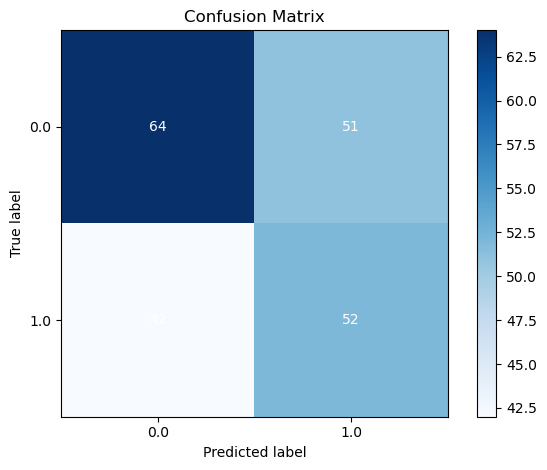

In [46]:
# Applying the best grid for logistic regression
best_grid_lr.fit(X_train, y_train)
y_pred=best_grid_lr.predict(X_test)
print(confusion_matrix(y_test,y_pred))
skplt.metrics.plot_confusion_matrix(y_test, y_pred);
save_fig('Confusion Matrix for Logistic Regression hyper-para tuned q3')
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

## Hyperparameter Tuning on SVM

In [47]:
from sklearn.svm import SVC

In [48]:
param_grid = {
    'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
    'random_state' : [42, None],
    'gamma' : ['scale', 'auto'],
    'shrinking' : [True, False],
    'probability' : [True, False],
    'decision_function_shape' : ['ovo', 'ovr'],
    'break_ties' : [True, False]
}

In [49]:
svc_grid = SVC()
grid_search_svc = GridSearchCV(estimator=svc_grid,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search_svc.fit(X_train,y_train)

Fitting 10 folds for each of 256 candidates, totalling 2560 fits


/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError

[CV] END .....................n_neighbors=5, weights=uniform; total time=   0.0s
[CV] END ....................n_neighbors=10, weights=uniform; total time=   0.0s
[CV] END ....................n_neighbors=10, weights=uniform; total time=   0.0s
[CV] END ....................n_neighbors=10, weights=uniform; total time=   0.0s
[CV] END ...................n_neighbors=10, weights=distance; total time=   0.0s
[CV] END ...................n_neighbors=10, weights=distance; total time=   0.0s
[CV] END ...................n_neighbors=10, weights=distance; total time=   0.0s
[CV] END ...................n_neighbors=10, weights=distance; total time=   0.0s
[CV] END ....................n_neighbors=25, weights=uniform; total time=   0.0s
[CV] END ....................n_neighbors=25, weights=uniform; total time=   0.0s
[CV] END ...................n_neighbors=25, weights=distance; total time=   0.0s
[CV] END ...................n_neighbors=25, weights=distance; total time=   0.0s
[CV] END ...................

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError

  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/base.py",

    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/aymanibnehakim/opt

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError

[CV] END .....................n_neighbors=5, weights=uniform; total time=   0.1s
[CV] END ...................n_neighbors=25, weights=distance; total time=   0.0s
[CV] END ....................n_neighbors=50, weights=uniform; total time=   0.0s
[CV] END ....................n_neighbors=50, weights=uniform; total time=   0.0s
[CV] END ...................n_neighbors=50, weights=distance; total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_features=auto, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_features=auto, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_features=sqrt, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_features=sqrt, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_features=sqrt, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_features=sqrt, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=10, max_

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError

[CV] END .....................n_neighbors=5, weights=uniform; total time=   0.0s
[CV] END ...................n_neighbors=10, weights=distance; total time=   0.0s
[CV] END ....................n_neighbors=25, weights=uniform; total time=   0.0s
[CV] END ....................n_neighbors=25, weights=uniform; total time=   0.0s
[CV] END ...................n_neighbors=25, weights=distance; total time=   0.0s
[CV] END ...................n_neighbors=25, weights=distance; total time=   0.0s
[CV] END ....................n_neighbors=50, weights=uniform; total time=   0.0s
[CV] END ....................n_neighbors=50, weights=uniform; total time=   0.0s
[CV] END ...................n_neighbors=50, weights=distance; total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_features=auto, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_features=sqrt, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_features=sqrt, splitter=best; total time=   0.0

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError

[CV] END .....................n_neighbors=5, weights=uniform; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=auto, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_features=auto, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_features=sqrt, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_features=sqrt, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=10, max_features=auto, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=10, max_features=auto, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=10, max_features=auto, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=10, max_features=auto, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=10, max_features=auto, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=10, max_features=auto, splitter=random; total time= 

[CV] END .....................n_neighbors=5, weights=uniform; total time=   0.1s
[CV] END ...................n_neighbors=50, weights=distance; total time=   0.0s
[CV] END ...................n_neighbors=50, weights=distance; total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_features=auto, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_features=auto, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_features=auto, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=10, max_features=auto, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=10, max_features=auto, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=10, max_features=sqrt, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=10, max_features=sqrt, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=10, max_features=sqrt, splitter=random; total time=   0.0s
[CV] END crite

[CV] END .....................n_neighbors=5, weights=uniform; total time=   0.1s
[CV] END .....................n_neighbors=5, weights=uniform; total time=   0.0s
[CV] END ....................n_neighbors=5, weights=distance; total time=   0.0s
[CV] END ....................n_neighbors=5, weights=distance; total time=   0.0s
[CV] END ....................n_neighbors=5, weights=distance; total time=   0.0s
[CV] END ....................n_neighbors=5, weights=distance; total time=   0.0s
[CV] END ....................n_neighbors=5, weights=distance; total time=   0.0s
[CV] END ....................n_neighbors=5, weights=distance; total time=   0.0s
[CV] END ....................n_neighbors=10, weights=uniform; total time=   0.0s
[CV] END ....................n_neighbors=10, weights=uniform; total time=   0.0s
[CV] END ....................n_neighbors=10, weights=uniform; total time=   0.0s
[CV] END ....................n_neighbors=10, weights=uniform; total time=   0.0s
[CV] END ...................

[CV] END .....................n_neighbors=5, weights=uniform; total time=   0.1s
[CV] END .....................n_neighbors=5, weights=uniform; total time=   0.0s
[CV] END ....................n_neighbors=5, weights=distance; total time=   0.0s
[CV] END ....................n_neighbors=5, weights=distance; total time=   0.0s
[CV] END ....................n_neighbors=5, weights=distance; total time=   0.0s
[CV] END ....................n_neighbors=5, weights=distance; total time=   0.0s
[CV] END ....................n_neighbors=10, weights=uniform; total time=   0.0s
[CV] END ....................n_neighbors=10, weights=uniform; total time=   0.0s
[CV] END ....................n_neighbors=10, weights=uniform; total time=   0.0s
[CV] END ...................n_neighbors=10, weights=distance; total time=   0.0s
[CV] END ...................n_neighbors=10, weights=distance; total time=   0.0s
[CV] END ...................n_neighbors=10, weights=distance; total time=   0.0s
[CV] END ...................

[CV] END ....penalty=l2, random_state=None, solver=newton-cg; total time=   0.0s
[CV] END ....penalty=None, random_state=42, solver=liblinear; total time=   0.0s
[CV] END ....penalty=None, random_state=42, solver=liblinear; total time=   0.0s
[CV] END ....penalty=None, random_state=42, solver=liblinear; total time=   0.0s
[CV] END ....penalty=None, random_state=42, solver=newton-cg; total time=   0.0s
[CV] END ....penalty=None, random_state=42, solver=newton-cg; total time=   0.0s
[CV] END ....penalty=None, random_state=42, solver=newton-cg; total time=   0.0s
[CV] END penalty=None, random_state=42, solver=newton-cholesky; total time=   0.0s
[CV] END ..........penalty=None, random_state=42, solver=sag; total time=   0.0s
[CV] END .........penalty=None, random_state=42, solver=saga; total time=   0.0s
[CV] END .........penalty=None, random_state=42, solver=saga; total time=   0.0s
[CV] END .........penalty=None, random_state=42, solver=saga; total time=   0.0s
[CV] END ......penalty=Non

[CV] END break_ties=True, decision_function_shape=ovo, gamma=scale, kernel=rbf, probability=False, random_state=42, shrinking=False; total time=   0.1s
[CV] END break_ties=True, decision_function_shape=ovo, gamma=scale, kernel=rbf, probability=False, random_state=None, shrinking=True; total time=   0.1s
[CV] END break_ties=True, decision_function_shape=ovo, gamma=scale, kernel=rbf, probability=False, random_state=None, shrinking=True; total time=   0.1s
[CV] END break_ties=True, decision_function_shape=ovo, gamma=scale, kernel=rbf, probability=False, random_state=None, shrinking=False; total time=   0.1s
[CV] END break_ties=True, decision_function_shape=ovo, gamma=scale, kernel=rbf, probability=False, random_state=None, shrinking=False; total time=   0.1s
[CV] END break_ties=True, decision_function_shape=ovo, gamma=scale, kernel=sigmoid, probability=True, random_state=42, shrinking=True; total time=   0.3s
[CV] END break_ties=True, decision_function_shape=ovo, gamma=scale, kernel=sigmo

[CV] END break_ties=True, decision_function_shape=ovo, gamma=scale, kernel=poly, probability=True, random_state=None, shrinking=False; total time=   0.2s
[CV] END break_ties=True, decision_function_shape=ovo, gamma=scale, kernel=poly, probability=False, random_state=None, shrinking=False; total time=   0.1s
[CV] END break_ties=True, decision_function_shape=ovo, gamma=scale, kernel=poly, probability=False, random_state=None, shrinking=False; total time=   0.0s
[CV] END break_ties=True, decision_function_shape=ovo, gamma=scale, kernel=rbf, probability=True, random_state=42, shrinking=False; total time=   0.4s
[CV] END break_ties=True, decision_function_shape=ovo, gamma=scale, kernel=rbf, probability=True, random_state=42, shrinking=False; total time=   0.4s
[CV] END break_ties=True, decision_function_shape=ovo, gamma=scale, kernel=rbf, probability=True, random_state=None, shrinking=True; total time=   0.4s
[CV] END break_ties=True, decision_function_shape=ovo, gamma=scale, kernel=rbf, pr

[CV] END break_ties=True, decision_function_shape=ovo, gamma=scale, kernel=rbf, probability=False, random_state=42, shrinking=False; total time=   0.1s
[CV] END break_ties=True, decision_function_shape=ovo, gamma=scale, kernel=rbf, probability=False, random_state=42, shrinking=False; total time=   0.1s
[CV] END break_ties=True, decision_function_shape=ovo, gamma=scale, kernel=rbf, probability=False, random_state=None, shrinking=True; total time=   0.1s
[CV] END break_ties=True, decision_function_shape=ovo, gamma=scale, kernel=rbf, probability=False, random_state=None, shrinking=True; total time=   0.1s
[CV] END break_ties=True, decision_function_shape=ovo, gamma=scale, kernel=rbf, probability=False, random_state=None, shrinking=False; total time=   0.1s
[CV] END break_ties=True, decision_function_shape=ovo, gamma=scale, kernel=rbf, probability=False, random_state=None, shrinking=False; total time=   0.1s
[CV] END break_ties=True, decision_function_shape=ovo, gamma=scale, kernel=sigmoid

[CV] END break_ties=True, decision_function_shape=ovo, gamma=auto, kernel=linear, probability=False, random_state=42, shrinking=True; total time=   0.0s
[CV] END break_ties=True, decision_function_shape=ovo, gamma=auto, kernel=linear, probability=False, random_state=42, shrinking=False; total time=   0.1s
[CV] END break_ties=True, decision_function_shape=ovo, gamma=auto, kernel=linear, probability=False, random_state=42, shrinking=False; total time=   0.0s
[CV] END break_ties=True, decision_function_shape=ovo, gamma=auto, kernel=linear, probability=False, random_state=None, shrinking=True; total time=   0.0s
[CV] END break_ties=True, decision_function_shape=ovo, gamma=auto, kernel=linear, probability=False, random_state=None, shrinking=True; total time=   0.0s
[CV] END break_ties=True, decision_function_shape=ovo, gamma=auto, kernel=linear, probability=False, random_state=None, shrinking=False; total time=   0.0s
[CV] END break_ties=True, decision_function_shape=ovo, gamma=auto, kernel

[CV] END break_ties=True, decision_function_shape=ovo, gamma=auto, kernel=poly, probability=True, random_state=42, shrinking=False; total time=   0.2s
[CV] END break_ties=True, decision_function_shape=ovo, gamma=auto, kernel=poly, probability=True, random_state=None, shrinking=False; total time=   0.3s
[CV] END break_ties=True, decision_function_shape=ovo, gamma=auto, kernel=poly, probability=True, random_state=None, shrinking=False; total time=   0.2s
[CV] END break_ties=True, decision_function_shape=ovo, gamma=auto, kernel=poly, probability=False, random_state=None, shrinking=False; total time=   0.1s
[CV] END break_ties=True, decision_function_shape=ovo, gamma=auto, kernel=poly, probability=False, random_state=None, shrinking=False; total time=   0.1s
[CV] END break_ties=True, decision_function_shape=ovo, gamma=auto, kernel=rbf, probability=True, random_state=42, shrinking=False; total time=   0.3s
[CV] END break_ties=True, decision_function_shape=ovo, gamma=auto, kernel=rbf, probab

[CV] END break_ties=True, decision_function_shape=ovo, gamma=auto, kernel=linear, probability=False, random_state=42, shrinking=True; total time=   0.1s
[CV] END break_ties=True, decision_function_shape=ovo, gamma=auto, kernel=linear, probability=False, random_state=42, shrinking=True; total time=   0.1s
[CV] END break_ties=True, decision_function_shape=ovo, gamma=auto, kernel=linear, probability=False, random_state=42, shrinking=True; total time=   0.1s
[CV] END break_ties=True, decision_function_shape=ovo, gamma=auto, kernel=linear, probability=False, random_state=42, shrinking=True; total time=   0.1s
[CV] END break_ties=True, decision_function_shape=ovo, gamma=auto, kernel=linear, probability=False, random_state=None, shrinking=True; total time=   0.0s
[CV] END break_ties=True, decision_function_shape=ovo, gamma=auto, kernel=linear, probability=False, random_state=None, shrinking=True; total time=   0.1s
[CV] END break_ties=True, decision_function_shape=ovo, gamma=auto, kernel=line

[CV] END break_ties=True, decision_function_shape=ovr, gamma=scale, kernel=linear, probability=False, random_state=None, shrinking=False; total time=   0.0s
[CV] END break_ties=True, decision_function_shape=ovr, gamma=scale, kernel=poly, probability=True, random_state=42, shrinking=False; total time=   0.2s
[CV] END break_ties=True, decision_function_shape=ovr, gamma=scale, kernel=poly, probability=True, random_state=42, shrinking=False; total time=   0.3s
[CV] END break_ties=True, decision_function_shape=ovr, gamma=scale, kernel=poly, probability=True, random_state=None, shrinking=False; total time=   0.2s
[CV] END break_ties=True, decision_function_shape=ovr, gamma=scale, kernel=poly, probability=True, random_state=None, shrinking=False; total time=   0.2s
[CV] END break_ties=True, decision_function_shape=ovr, gamma=scale, kernel=poly, probability=False, random_state=42, shrinking=True; total time=   0.1s
[CV] END break_ties=True, decision_function_shape=ovr, gamma=scale, kernel=poly

[CV] END break_ties=True, decision_function_shape=ovr, gamma=auto, kernel=linear, probability=True, random_state=42, shrinking=False; total time=   0.2s
[CV] END break_ties=True, decision_function_shape=ovr, gamma=auto, kernel=linear, probability=True, random_state=None, shrinking=False; total time=   0.2s
[CV] END break_ties=True, decision_function_shape=ovr, gamma=auto, kernel=linear, probability=True, random_state=None, shrinking=False; total time=   0.2s
[CV] END break_ties=True, decision_function_shape=ovr, gamma=auto, kernel=linear, probability=False, random_state=None, shrinking=True; total time=   0.0s
[CV] END break_ties=True, decision_function_shape=ovr, gamma=auto, kernel=linear, probability=False, random_state=None, shrinking=True; total time=   0.1s
[CV] END break_ties=True, decision_function_shape=ovr, gamma=auto, kernel=poly, probability=True, random_state=42, shrinking=True; total time=   0.2s
[CV] END break_ties=True, decision_function_shape=ovr, gamma=auto, kernel=pol

[CV] END break_ties=True, decision_function_shape=ovr, gamma=auto, kernel=poly, probability=False, random_state=42, shrinking=False; total time=   0.1s
[CV] END break_ties=True, decision_function_shape=ovr, gamma=auto, kernel=poly, probability=False, random_state=42, shrinking=False; total time=   0.1s
[CV] END break_ties=True, decision_function_shape=ovr, gamma=auto, kernel=poly, probability=False, random_state=None, shrinking=True; total time=   0.1s
[CV] END break_ties=True, decision_function_shape=ovr, gamma=auto, kernel=poly, probability=False, random_state=None, shrinking=True; total time=   0.1s
[CV] END break_ties=True, decision_function_shape=ovr, gamma=auto, kernel=poly, probability=False, random_state=None, shrinking=True; total time=   0.0s
[CV] END break_ties=True, decision_function_shape=ovr, gamma=auto, kernel=poly, probability=False, random_state=None, shrinking=True; total time=   0.1s
[CV] END break_ties=True, decision_function_shape=ovr, gamma=auto, kernel=rbf, proba

[CV] END break_ties=True, decision_function_shape=ovr, gamma=auto, kernel=linear, probability=False, random_state=None, shrinking=False; total time=   0.1s
[CV] END break_ties=True, decision_function_shape=ovr, gamma=auto, kernel=poly, probability=True, random_state=42, shrinking=True; total time=   0.2s
[CV] END break_ties=True, decision_function_shape=ovr, gamma=auto, kernel=poly, probability=True, random_state=42, shrinking=True; total time=   0.3s
[CV] END break_ties=True, decision_function_shape=ovr, gamma=auto, kernel=poly, probability=True, random_state=None, shrinking=True; total time=   0.2s
[CV] END break_ties=True, decision_function_shape=ovr, gamma=auto, kernel=poly, probability=True, random_state=None, shrinking=True; total time=   0.2s
[CV] END break_ties=True, decision_function_shape=ovr, gamma=auto, kernel=poly, probability=False, random_state=42, shrinking=True; total time=   0.1s
[CV] END break_ties=True, decision_function_shape=ovr, gamma=auto, kernel=poly, probabili

[CV] END break_ties=True, decision_function_shape=ovr, gamma=auto, kernel=sigmoid, probability=False, random_state=None, shrinking=False; total time=   0.1s
[CV] END break_ties=True, decision_function_shape=ovr, gamma=auto, kernel=sigmoid, probability=False, random_state=None, shrinking=False; total time=   0.1s
[CV] END break_ties=False, decision_function_shape=ovo, gamma=scale, kernel=linear, probability=True, random_state=42, shrinking=True; total time=   0.2s
[CV] END break_ties=False, decision_function_shape=ovo, gamma=scale, kernel=linear, probability=True, random_state=42, shrinking=True; total time=   0.2s
[CV] END break_ties=False, decision_function_shape=ovo, gamma=scale, kernel=linear, probability=True, random_state=None, shrinking=True; total time=   0.2s
[CV] END break_ties=False, decision_function_shape=ovo, gamma=scale, kernel=linear, probability=True, random_state=None, shrinking=True; total time=   0.2s
[CV] END break_ties=False, decision_function_shape=ovo, gamma=scal

[CV] END break_ties=False, decision_function_shape=ovr, gamma=scale, kernel=poly, probability=False, random_state=None, shrinking=True; total time=   0.1s[CV] END break_ties=True, decision_function_shape=ovr, gamma=auto, kernel=sigmoid, probability=True, random_state=None, shrinking=True; total time=   0.3s
[CV] END break_ties=True, decision_function_shape=ovr, gamma=auto, kernel=sigmoid, probability=False, random_state=42, shrinking=True; total time=   0.1s
[CV] END break_ties=True, decision_function_shape=ovr, gamma=auto, kernel=sigmoid, probability=False, random_state=42, shrinking=True; total time=   0.1s
[CV] END break_ties=True, decision_function_shape=ovr, gamma=auto, kernel=sigmoid, probability=False, random_state=42, shrinking=False; total time=   0.1s
[CV] END break_ties=True, decision_function_shape=ovr, gamma=auto, kernel=sigmoid, probability=False, random_state=42, shrinking=False; total time=   0.1s
[CV] END break_ties=True, decision_function_shape=ovr, gamma=auto, kernel

[CV] END break_ties=True, decision_function_shape=ovr, gamma=auto, kernel=sigmoid, probability=True, random_state=None, shrinking=False; total time=   0.3s
[CV] END break_ties=True, decision_function_shape=ovr, gamma=auto, kernel=sigmoid, probability=False, random_state=None, shrinking=False; total time=   0.1s
[CV] END break_ties=True, decision_function_shape=ovr, gamma=auto, kernel=sigmoid, probability=False, random_state=None, shrinking=False; total time=   0.1s
[CV] END break_ties=False, decision_function_shape=ovo, gamma=scale, kernel=linear, probability=True, random_state=42, shrinking=False; total time=   0.2s
[CV] END break_ties=False, decision_function_shape=ovo, gamma=scale, kernel=linear, probability=True, random_state=42, shrinking=False; total time=   0.3s
[CV] END break_ties=False, decision_function_shape=ovo, gamma=scale, kernel=linear, probability=True, random_state=None, shrinking=False; total time=   0.2s
[CV] END break_ties=False, decision_function_shape=ovo, gamma=s

[CV] END break_ties=True, decision_function_shape=ovr, gamma=auto, kernel=rbf, probability=False, random_state=None, shrinking=True; total time=   0.1s
[CV] END break_ties=True, decision_function_shape=ovr, gamma=auto, kernel=rbf, probability=False, random_state=None, shrinking=False; total time=   0.1s
[CV] END break_ties=True, decision_function_shape=ovr, gamma=auto, kernel=rbf, probability=False, random_state=None, shrinking=False; total time=   0.1s
[CV] END break_ties=True, decision_function_shape=ovr, gamma=auto, kernel=sigmoid, probability=True, random_state=42, shrinking=True; total time=   0.3s
[CV] END break_ties=True, decision_function_shape=ovr, gamma=auto, kernel=sigmoid, probability=True, random_state=42, shrinking=True; total time=   0.3s
[CV] END break_ties=True, decision_function_shape=ovr, gamma=auto, kernel=sigmoid, probability=True, random_state=None, shrinking=True; total time=   0.3s
[CV] END break_ties=True, decision_function_shape=ovr, gamma=auto, kernel=sigmoid

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan 0.55247253 0.55247253
 0.55247253 0.55247253 0.55247253 0.55247253 0.55247253 0.55247253
 0.58214286 0.582142

GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid={'break_ties': [True, False],
                         'decision_function_shape': ['ovo', 'ovr'],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                         'probability': [True, False],
                         'random_state': [42, None],
                         'shrinking': [True, False]},
             verbose=2)

In [50]:
best_grid_svc = grid_search_svc.best_estimator_
best_grid_svc

SVC(break_ties=True, probability=True, random_state=42)

[[75 40]
 [49 45]]
Accuracy Score 0.5741626794258373
Classification report:               precision    recall  f1-score   support

         0.0       0.60      0.65      0.63       115
         1.0       0.53      0.48      0.50        94

    accuracy                           0.57       209
   macro avg       0.57      0.57      0.57       209
weighted avg       0.57      0.57      0.57       209



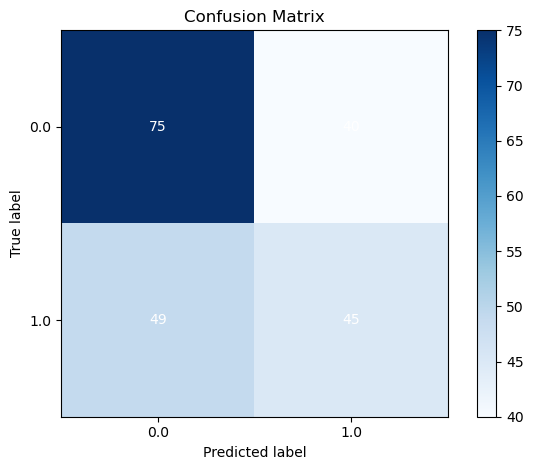

In [51]:
# Applying the best grid for SVC
best_grid_svc.fit(X_train, y_train)
y_pred=best_grid_svc.predict(X_test)
print(confusion_matrix(y_test,y_pred))
skplt.metrics.plot_confusion_matrix(y_test, y_pred);
save_fig('Confusion Matrix for SVC hyper-para tuned q3')
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

## Ensemble Learning

In [52]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

## Hard Voting classifier

In [53]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [54]:
log_clf = LogisticRegression(random_state=42)
rnd_clf = RandomForestClassifier(random_state=42)
svm_clf = SVC(random_state=42)
voting_clf = VotingClassifier(
    estimators=[
        ('lr', best_grid_lr),
        ('rf', best_grid_rf),
        ('svc', best_grid_svc)
    ], 
    voting = 'hard'
)
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf', RandomForestClassifier(n_estimators=10)),
                             ('svc',
                              SVC(break_ties=True, probability=True,
                                  random_state=42))])

In [55]:
from sklearn.metrics import accuracy_score
for clf in [best_grid_lr, best_grid_rf, best_grid_svc, voting_clf]:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.5550239234449761
RandomForestClassifier 0.69377990430622
SVC 0.5741626794258373
VotingClassifier 0.6124401913875598


## Soft voting classifier

In [56]:
log_clf = LogisticRegression(random_state=42)
rnd_clf = RandomForestClassifier(random_state=42)
svm_clf = SVC(random_state=42, probability = True)
voting_clf = VotingClassifier(
    estimators=[
        ('lr', best_grid_lr),
        ('rf', best_grid_rf),
        ('svc', best_grid_svc)
    ], 
    voting = 'soft'
)
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf', RandomForestClassifier(n_estimators=10)),
                             ('svc',
                              SVC(break_ties=True, probability=True,
                                  random_state=42))],
                 voting='soft')

In [57]:
from sklearn.metrics import accuracy_score
for clf in [best_grid_lr, best_grid_rf, best_grid_svc, voting_clf]:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.5550239234449761
RandomForestClassifier 0.6698564593301436
SVC 0.5741626794258373
VotingClassifier 0.7272727272727273


## bagging and pasting

In [58]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500,
                            max_samples=100, n_jobs=-1, random_state=42)
bag_clf.fit(X_train, y_train)


BaggingClassifier(estimator=DecisionTreeClassifier(), max_samples=100,
                  n_estimators=500, n_jobs=-1, random_state=42)

## out of bag evaluation

In [59]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500,
                            oob_score=True, n_jobs=-1, random_state=42)
bag_clf.fit(X_train, y_train)
print('OOB Score', bag_clf.oob_score_)

y_pred = bag_clf.predict(X_test)
print('Test Accuracy', accuracy_score(y_test, y_pred))

OOB Score 0.7412663755458515
Test Accuracy 0.7129186602870813


## impact of no. of estimators

In [60]:
import numpy as np
est = range(50, 500, 50)
train_acc = []
test_acc = []
oob_acc = []
estim = []
out = []
for num_est in est:
    estim.append(num_est)
    rnd_clf = RandomForestClassifier(n_estimators=num_est, oob_score = True, 
                                     max_leaf_nodes=16, n_jobs=-1, 
                                     random_state=42)
    rnd_clf.fit(X_train, y_train)
    y_pred_rf = rnd_clf.predict(X_test)
    train_acc.append(
        accuracy_score(y_train, rnd_clf.predict(X_train)))
    test_acc.append(
        accuracy_score(y_test, rnd_clf.predict(X_test)))
    oob_acc.append(rnd_clf.oob_score_)
i = 0
while i < len(estim):
    print('Num of estimators: ', estim[i], ' train acc = ', train_acc[i],
         ' test acc = ', test_acc[i], 'oob = ', oob_acc[i])
    i = i + 1

Num of estimators:  50  train acc =  0.7139737991266376  test acc =  0.6172248803827751 oob =  0.6331877729257642
Num of estimators:  100  train acc =  0.7150655021834061  test acc =  0.6363636363636364 oob =  0.62882096069869
Num of estimators:  150  train acc =  0.7205240174672489  test acc =  0.6220095693779905 oob =  0.6353711790393013
Num of estimators:  200  train acc =  0.7237991266375546  test acc =  0.6124401913875598 oob =  0.6342794759825328
Num of estimators:  250  train acc =  0.7194323144104804  test acc =  0.6076555023923444 oob =  0.6342794759825328
Num of estimators:  300  train acc =  0.722707423580786  test acc =  0.6076555023923444 oob =  0.6364628820960698
Num of estimators:  350  train acc =  0.7183406113537117  test acc =  0.6076555023923444 oob =  0.62882096069869
Num of estimators:  400  train acc =  0.722707423580786  test acc =  0.6028708133971292 oob =  0.6266375545851528
Num of estimators:  450  train acc =  0.7194323144104804  test acc =  0.602870813397129

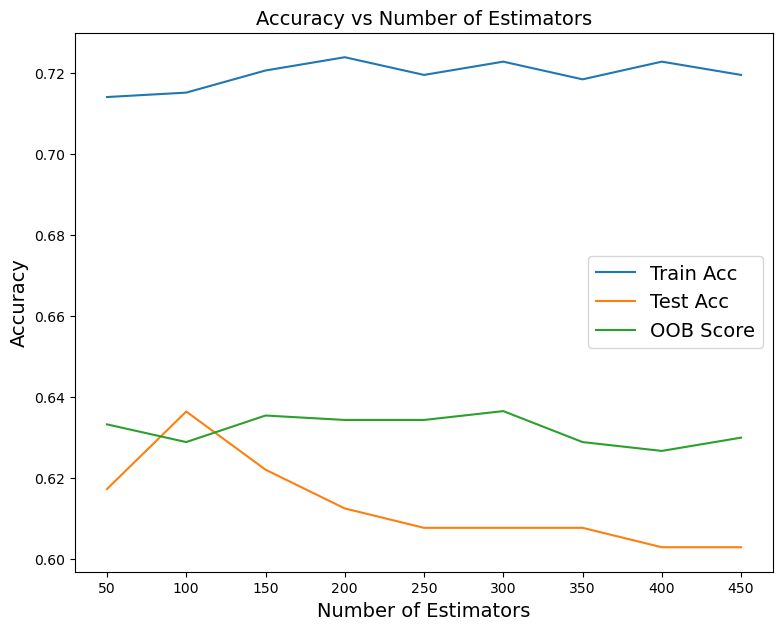

In [61]:
plt.figure(figsize = (9,7))
plt.plot(estim, train_acc, label = 'Train Acc')
plt.plot(estim, test_acc, label = 'Test Acc')
plt.plot(estim, oob_acc, label = 'OOB Score')
plt.legend()
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of Estimators')
plt.show()

## ADA boost classifier

In [62]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=100,
    learning_rate=0.5, random_state=42)
ada_clf.fit(X_train, y_train)
y_pred = ada_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.583732057416268

In [63]:
import numpy as np
est = np.linspace(1, 500, 2)
train_acc = []
test_acc = []
num_learners = []
for estimators in est:
    ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=int(estimators),
    learning_rate=0.5, random_state=42)
    ada_clf.fit(X_train, y_train)
    y_pred_test = ada_clf.predict(X_test)
    y_pred_train = ada_clf.predict(X_train)
    train_acc.append(accuracy_score(y_train, y_pred_train))
    test_acc.append(accuracy_score(y_test, y_pred_test))
    num_learners.append(estimators)

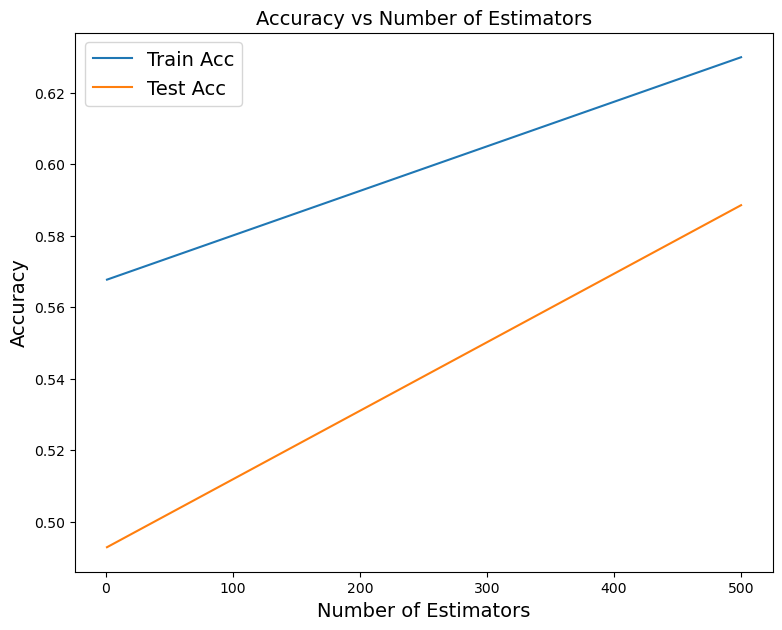

In [64]:
plt.figure(figsize = (9,7))
plt.plot(num_learners, train_acc, label = 'Train Acc')
plt.plot(num_learners, test_acc, label = 'Test Acc')
plt.legend()
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of Estimators')
plt.show()

## Logistic Regression

## XAI

## SVM